# 1. 데이터 LOAD

In [23]:
#Data Load
import pandas as pd
train_dataset= pd.read_csv("./data/train.csv")
test_dataset= pd.read_csv("./data/test.csv")

In [26]:
#check Train Set #row 5개만 보여주기
train_dataset.head()
#print(train_dataset.shape)
#print(test_dataset.shape)

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2


In [27]:
#Split to Image & letter & digit
train_images=(train_dataset.iloc[:,3:].values).astype("float32")
train_digit=train_dataset["digit"].values
train_letter=train_dataset["letter"].values

test_images=(test_dataset.values[:,2:]).astype("float32")
test_letter=test_dataset["letter"].values

In [35]:
train_images.reshape(-1,28,28)

array([[[1., 1., 1., ..., 2., 0., 4.],
        [0., 1., 3., ..., 4., 1., 3.],
        [2., 0., 4., ..., 3., 3., 3.],
        ...,
        [2., 1., 2., ..., 4., 1., 0.],
        [3., 3., 3., ..., 3., 3., 0.],
        [3., 2., 2., ..., 4., 3., 4.]],

       [[0., 4., 0., ..., 1., 4., 2.],
        [3., 3., 4., ..., 3., 4., 2.],
        [1., 4., 2., ..., 4., 0., 4.],
        ...,
        [2., 4., 4., ..., 0., 0., 1.],
        [3., 1., 4., ..., 2., 2., 4.],
        [2., 1., 1., ..., 2., 1., 2.]],

       [[1., 1., 2., ..., 2., 4., 1.],
        [1., 2., 0., ..., 2., 4., 0.],
        [4., 2., 0., ..., 1., 3., 3.],
        ...,
        [3., 0., 1., ..., 2., 2., 1.],
        [0., 3., 2., ..., 4., 2., 3.],
        [4., 4., 4., ..., 0., 2., 2.]],

       ...,

       [[4., 0., 4., ..., 3., 2., 3.],
        [4., 3., 1., ..., 4., 4., 4.],
        [3., 2., 0., ..., 1., 3., 0.],
        ...,
        [4., 0., 4., ..., 0., 2., 0.],
        [4., 3., 1., ..., 0., 4., 4.],
        [1., 3., 3., ..., 2., 0.

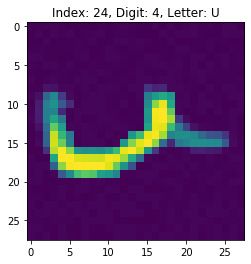

In [34]:
#Visualization
import matplotlib.pyplot as plt
idx = 24
img = train_dataset.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train_dataset.loc[idx, 'digit']
letter = train_dataset.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

## 1-(2). Data Augmentation

In [38]:
# from keras.preprocessing.image import ImageDataGenerator

# # create and configure augmented image generator
# datagen = ImageDataGenerator(
#         rotation_range=40, #이미지 회전 범위
#         width_shift_range=0.2, 
#         height_shift_range=0.2, #평행이동
#         rescale=1./255, #스케일링 0-1 범위로
#         shear_range=0.2, #임의 전단변환 shearing
#         #zoom_range=0.2, #임의의 확대/축소
#         horizontal_flip=True) #50% 확률로 이미지를 수평으로 뒤집기
# datagen.fit(train_images)

## 1-(3) Letter preprocessing

In [40]:
import numpy as np
print('digit  : ', np.unique(train_digit))
print('letter : ', np.unique(train_letter))

digit  :  [0 1 2 3 4 5 6 7 8 9]
letter :  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']


### Visualize

- left fig : 원본데이터
- right fig : 숫자 부분이라고 생각되는 부분 임의로 추출
<br>
- letter 은 대소문자 구분없는 것으로 총 52개
- 데이터가 만들어지는 과정 => letter 먼저 그려지고 digit을 그리는데 겹쳐지는 부분만 남기고 나머지는 제거하는 방식
- 겹쳐져 있는 부분의 pixel 값이 약간 다름
- 임의로 일정 pixel 이상의 값을 가진 것만 남겨 이미지를 출력해보면 어떤 형태로 데이터가 생성됐을 지 예상가능

C:\Users\woojung\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


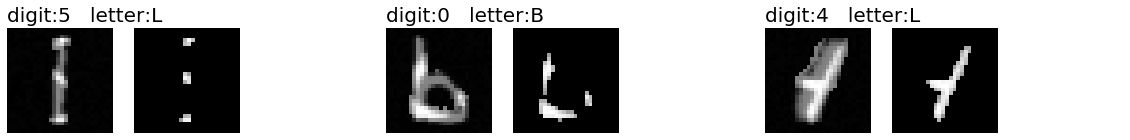

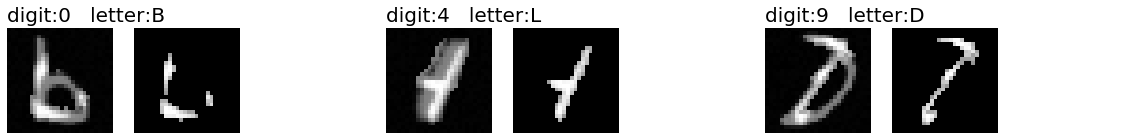

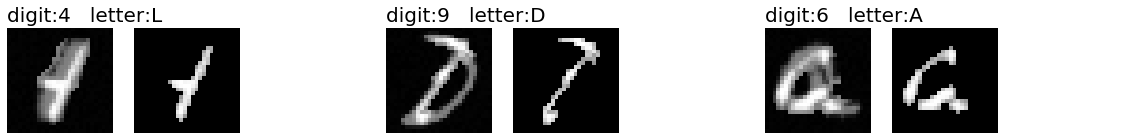

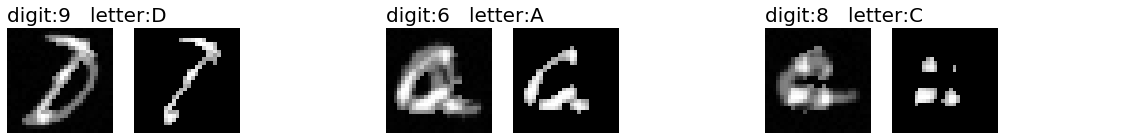

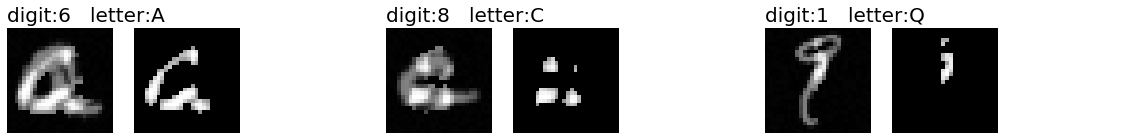

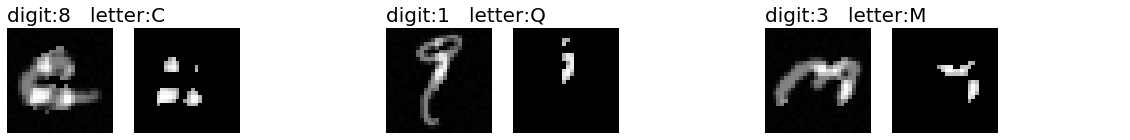

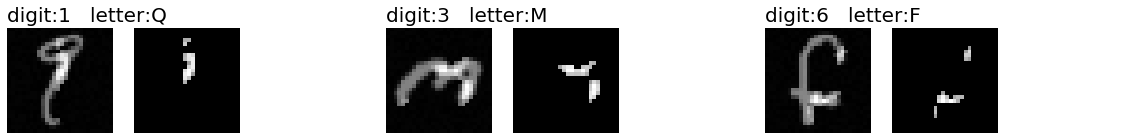

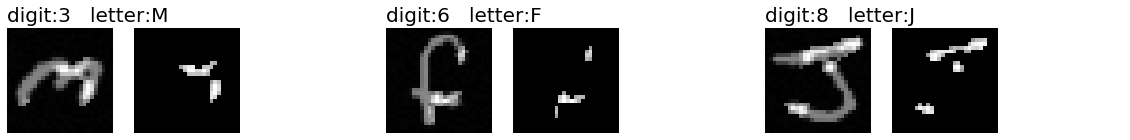

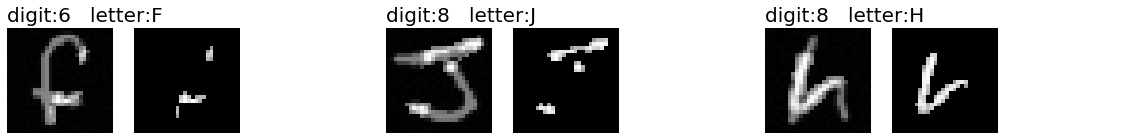

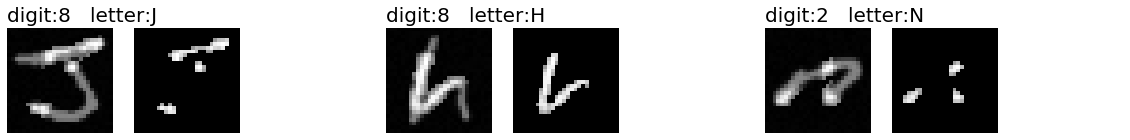

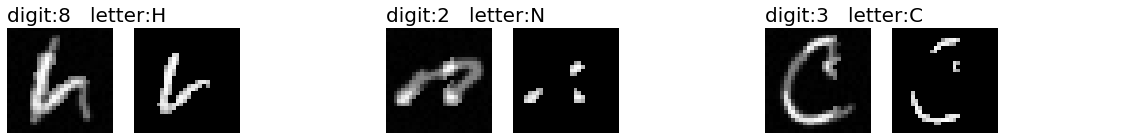

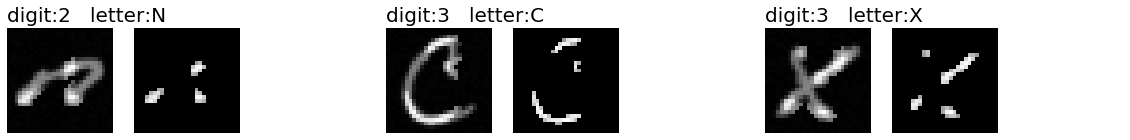

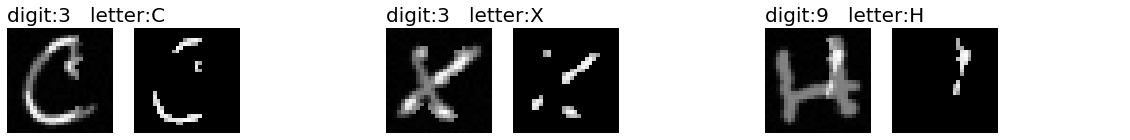

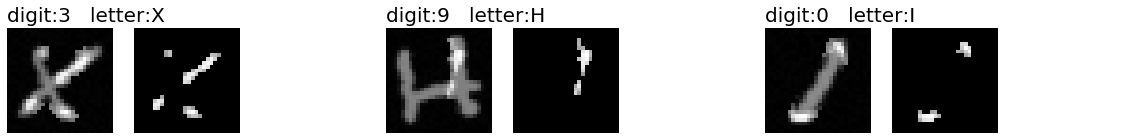

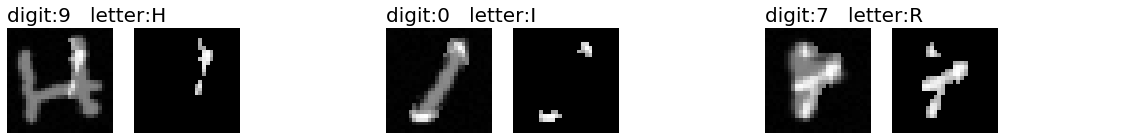

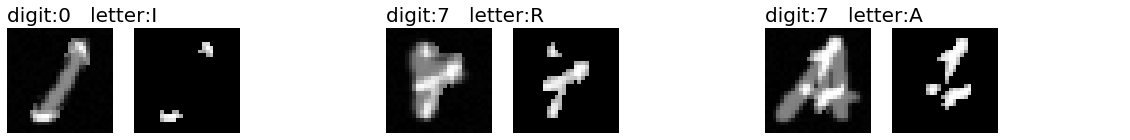

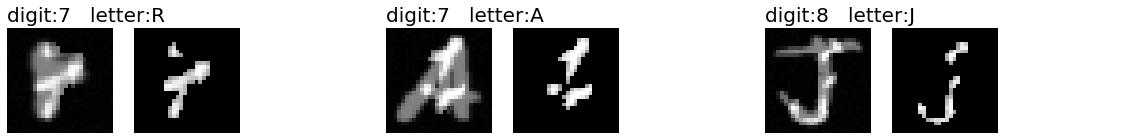

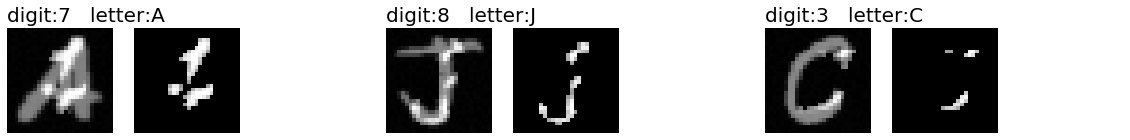

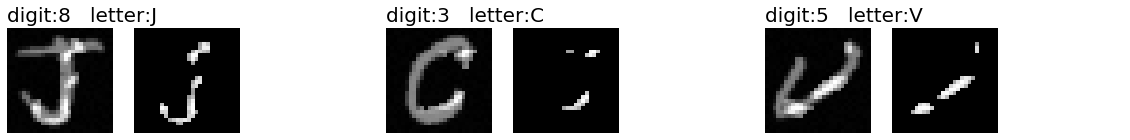

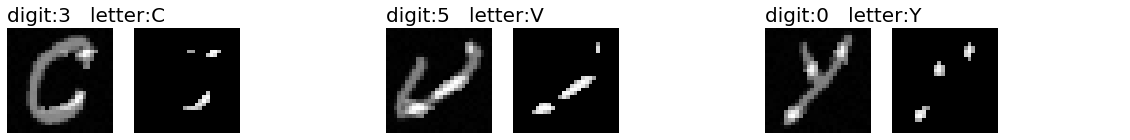

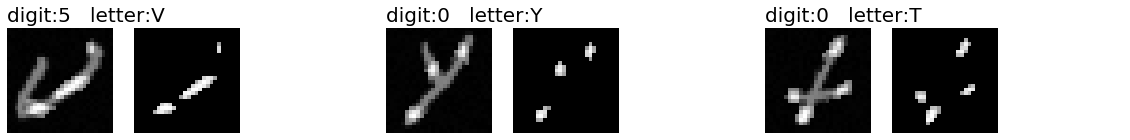

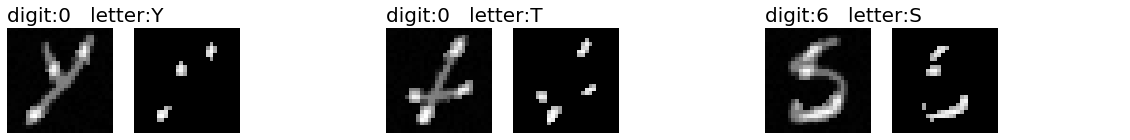

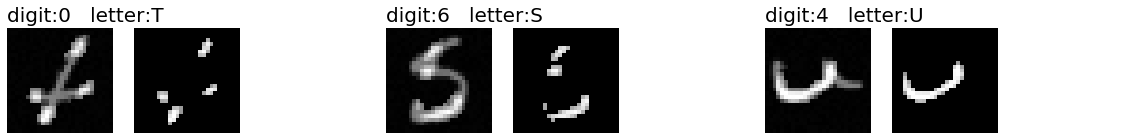

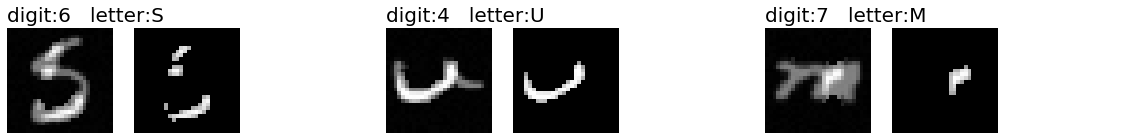

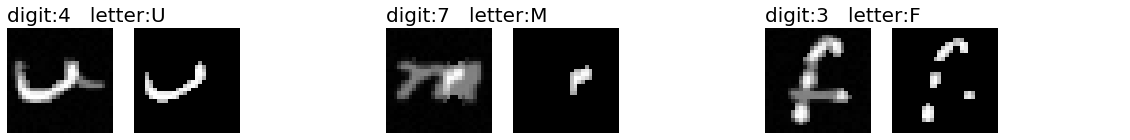

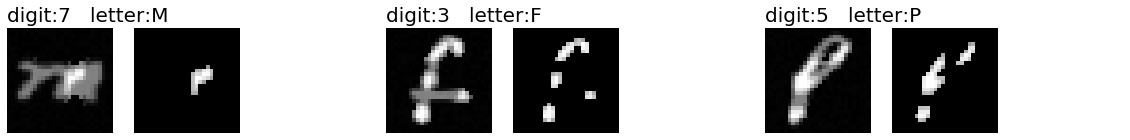

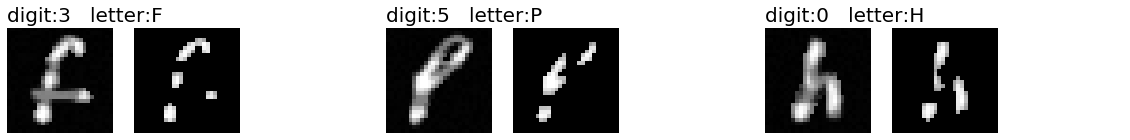

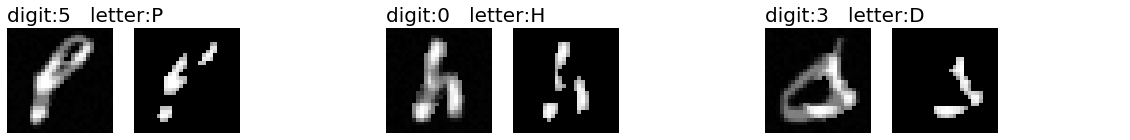

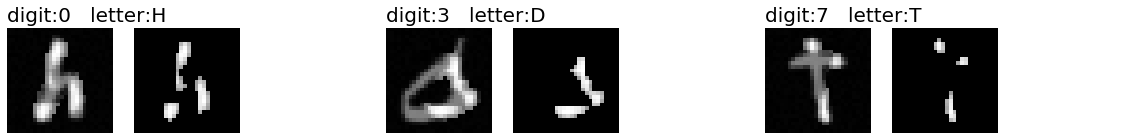

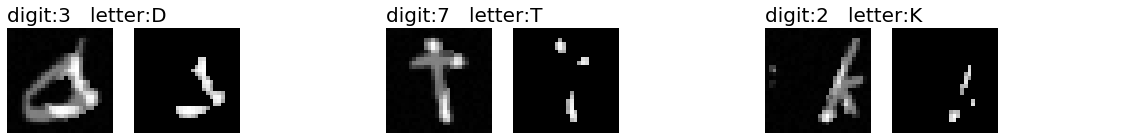

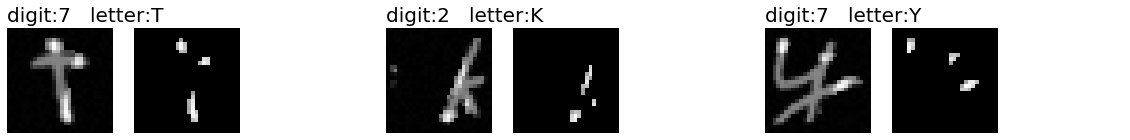

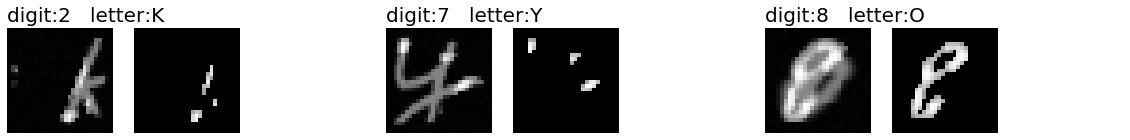

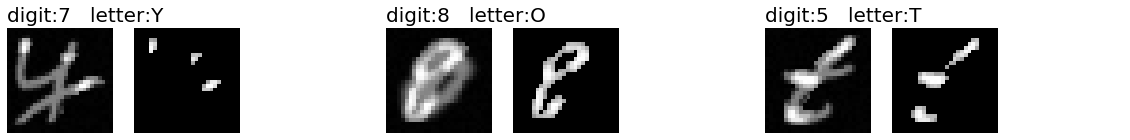

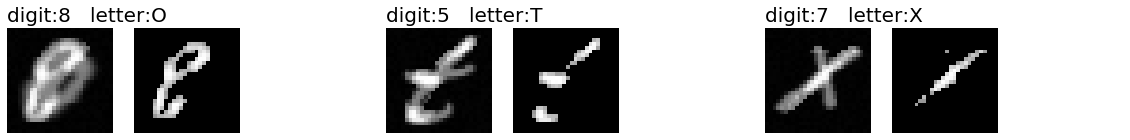

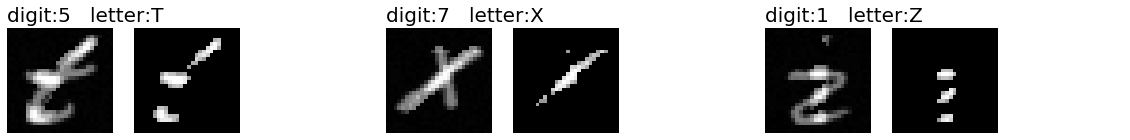

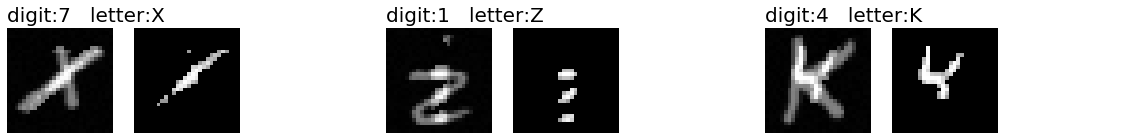

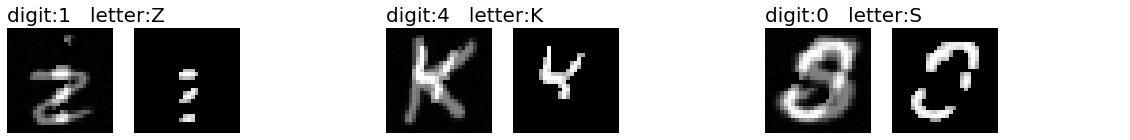

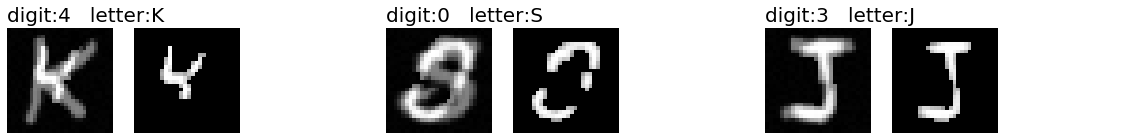

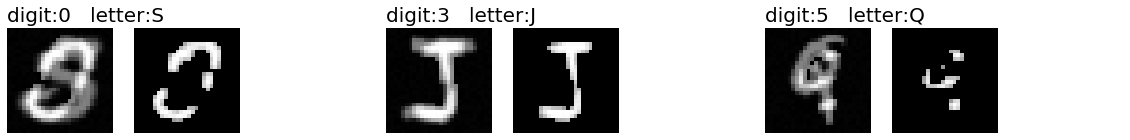

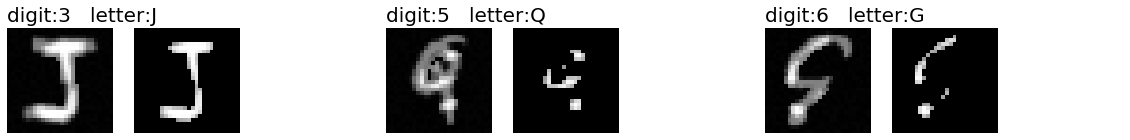

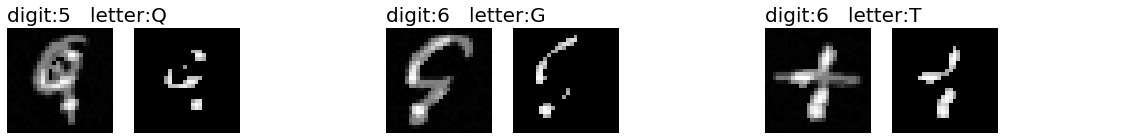

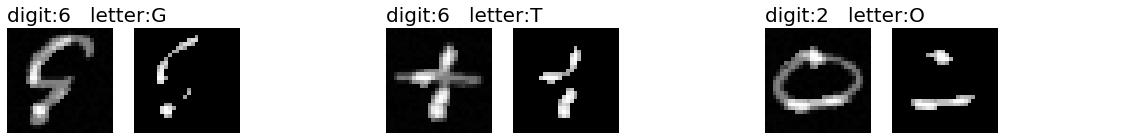

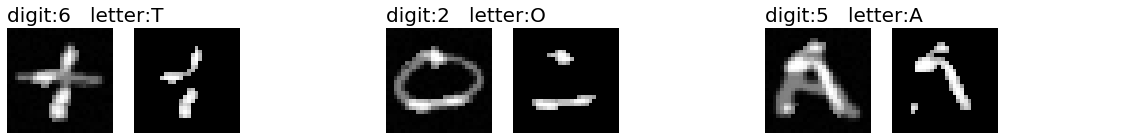

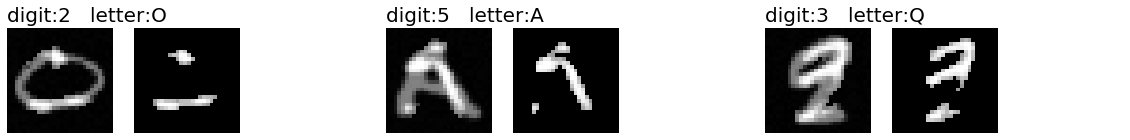

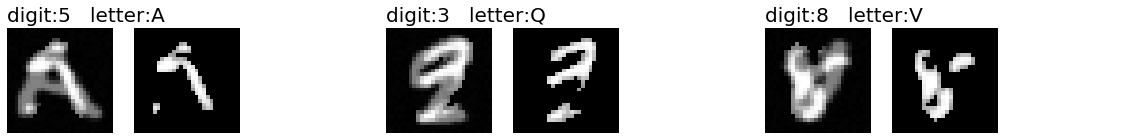

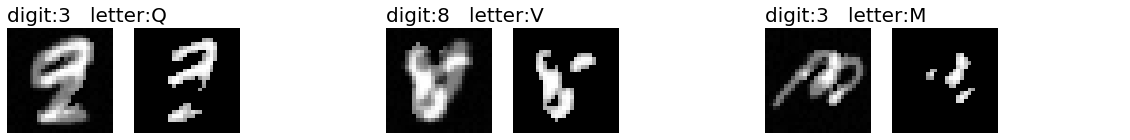

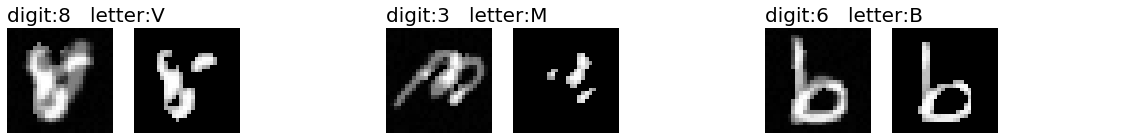

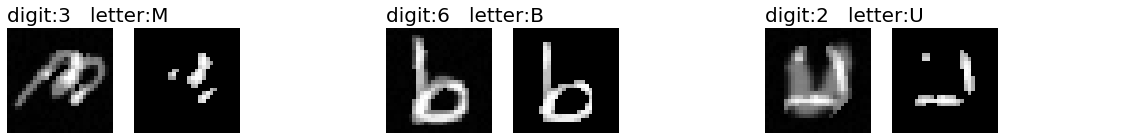

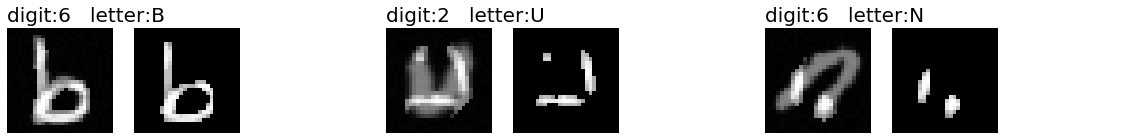

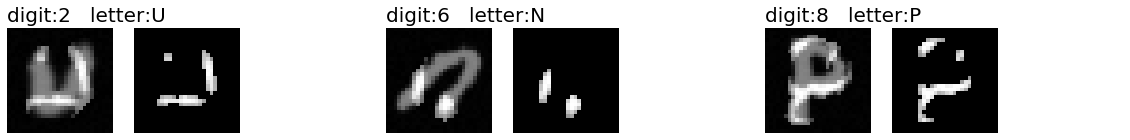

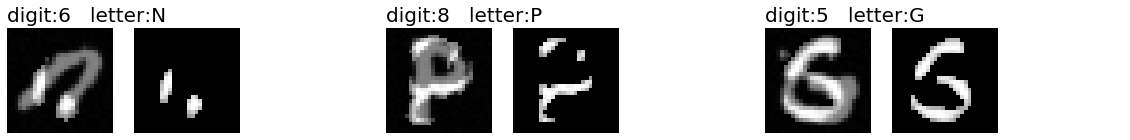

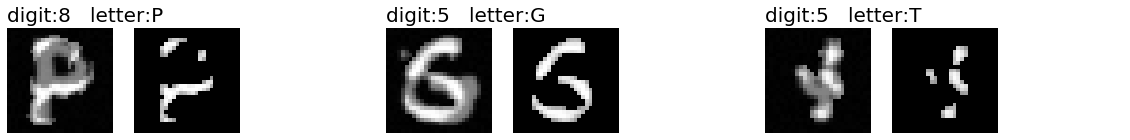

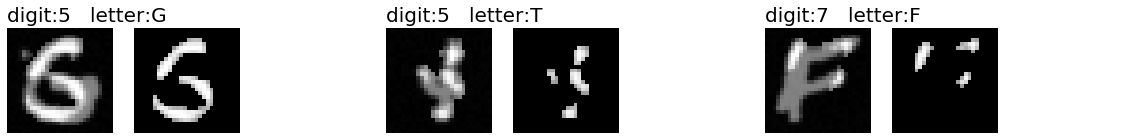

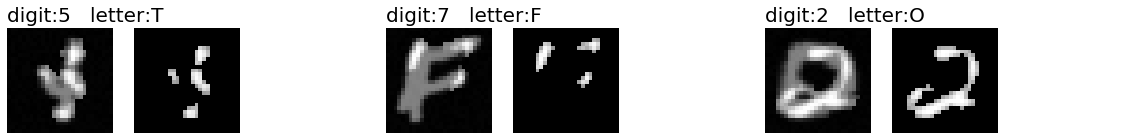

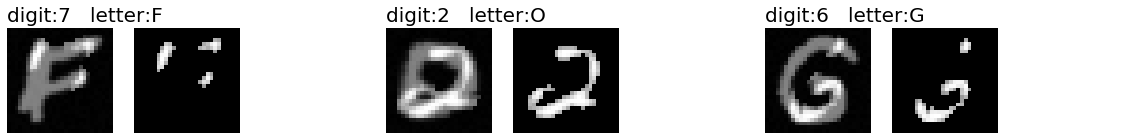

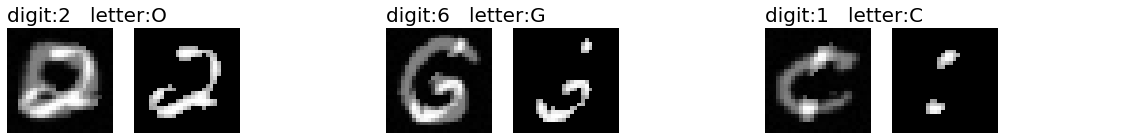

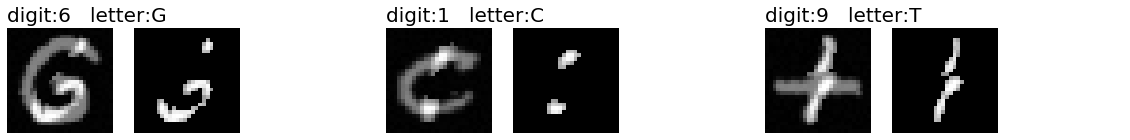

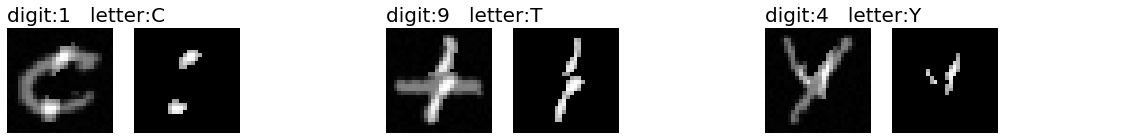

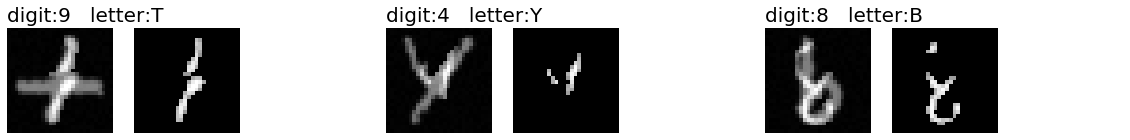

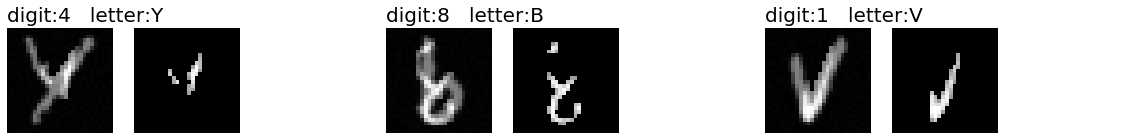

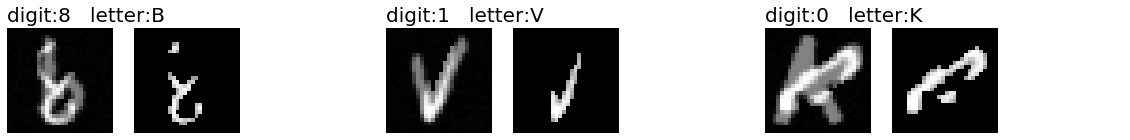

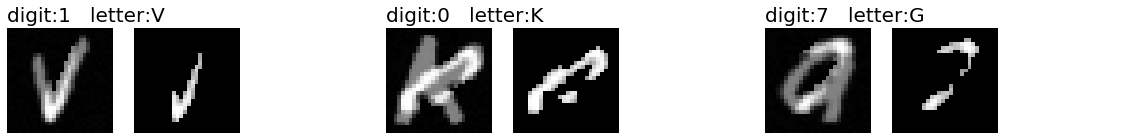

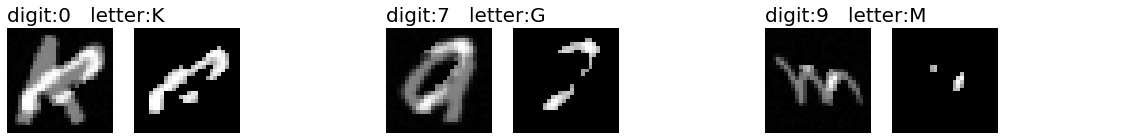

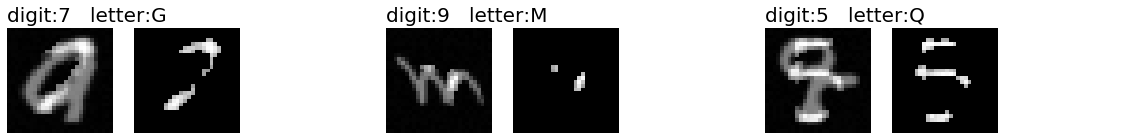

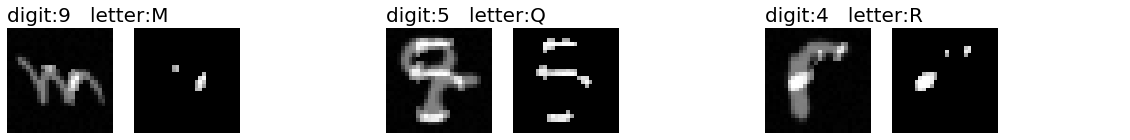

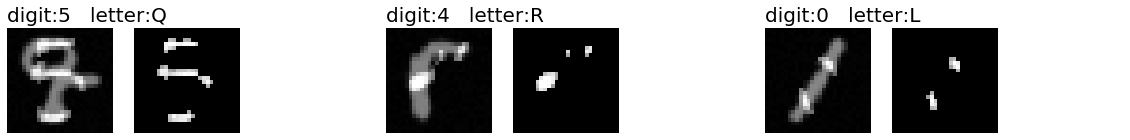

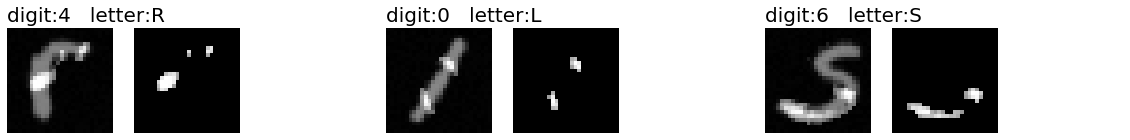

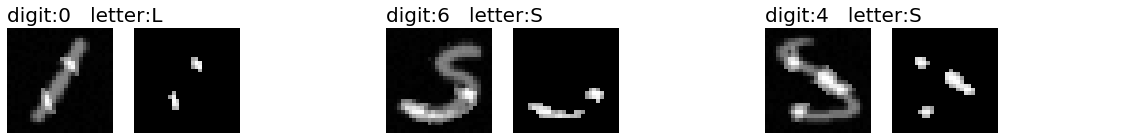

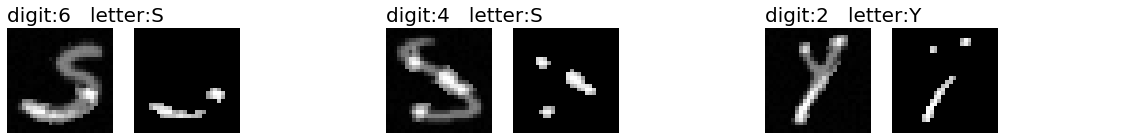

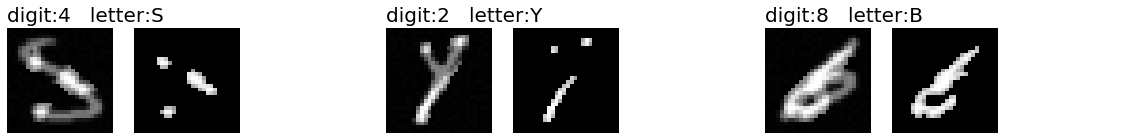

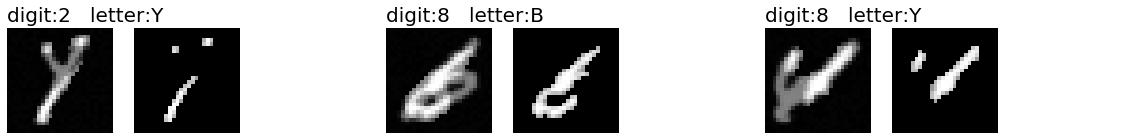

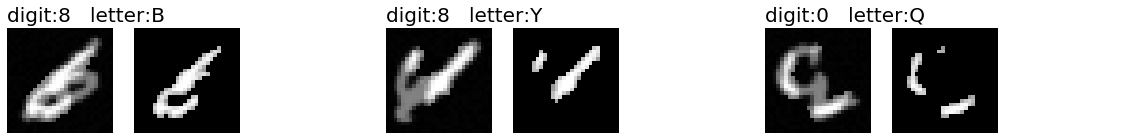

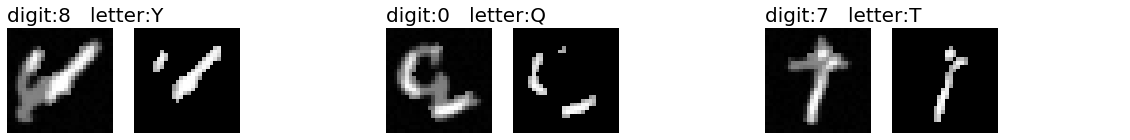

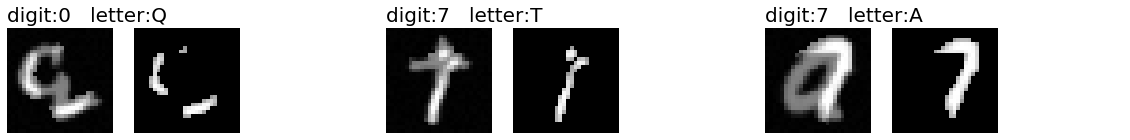

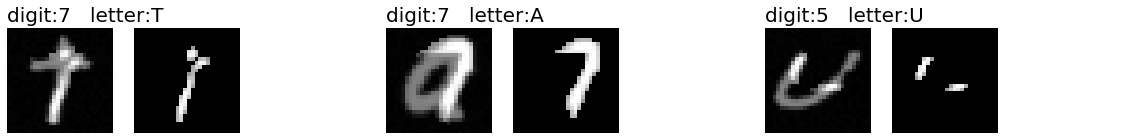

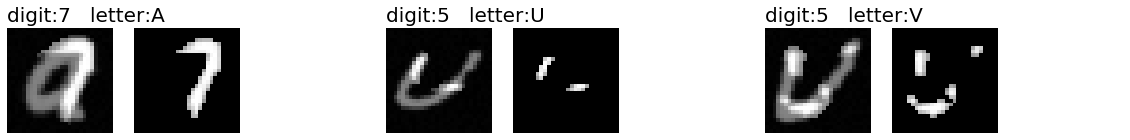

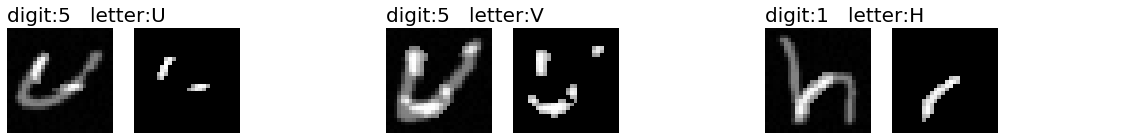

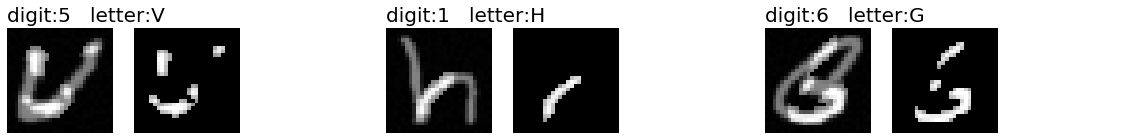

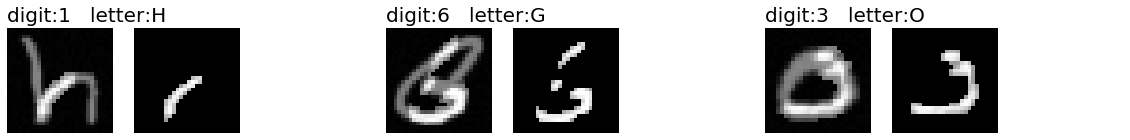

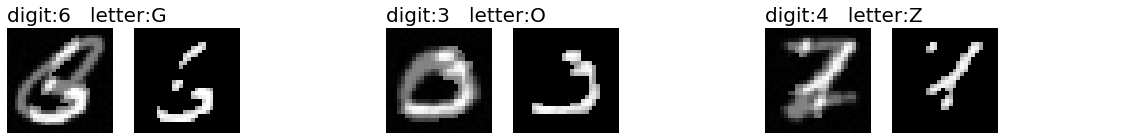

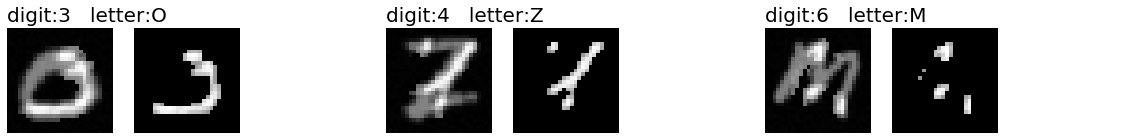

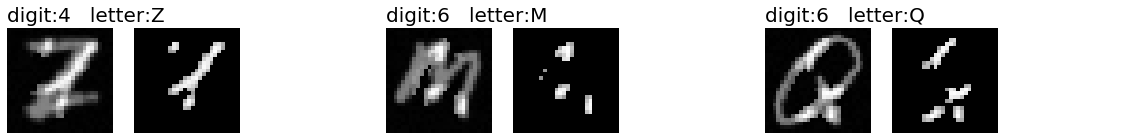

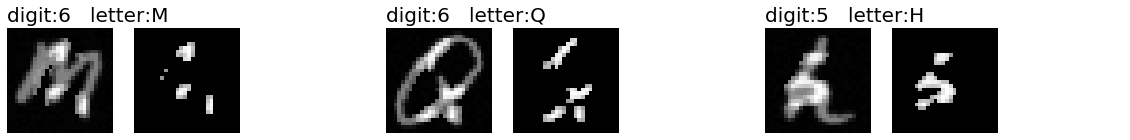

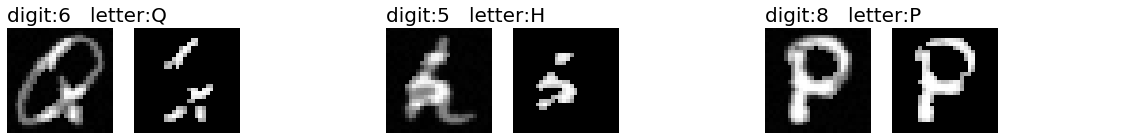

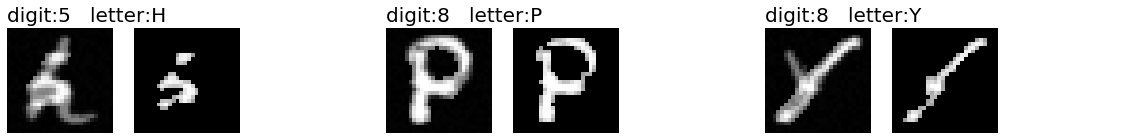

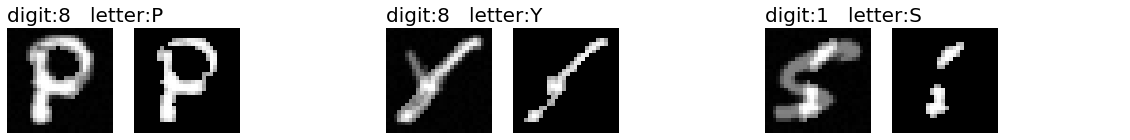

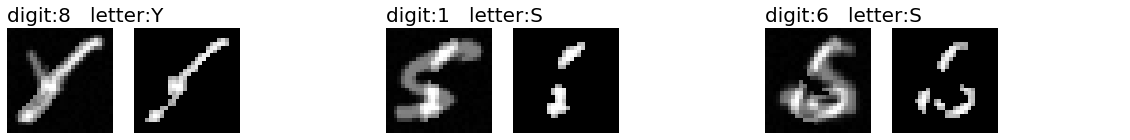

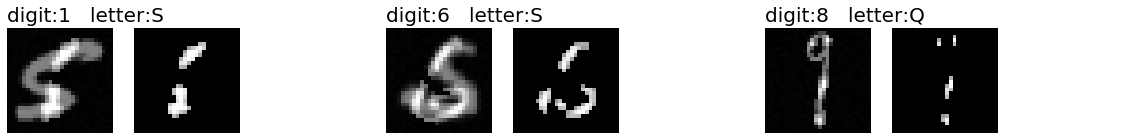

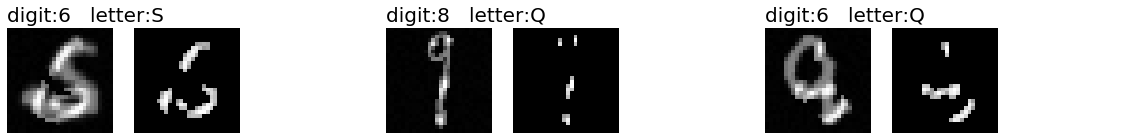

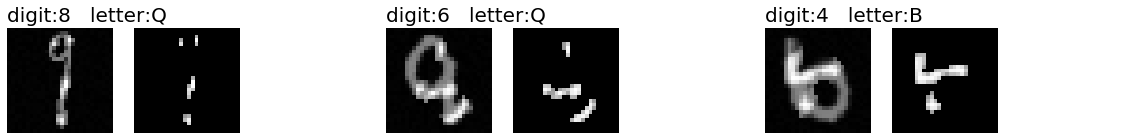

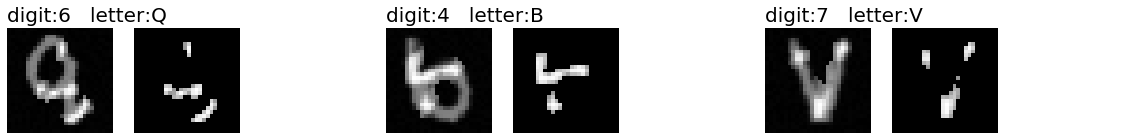

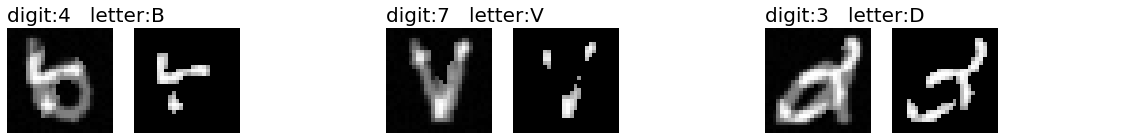

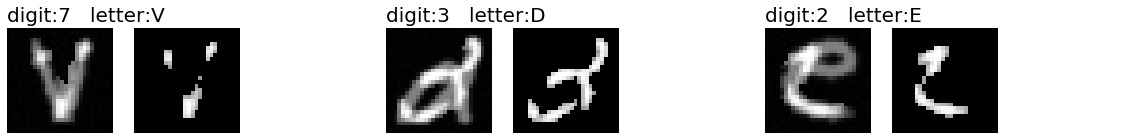

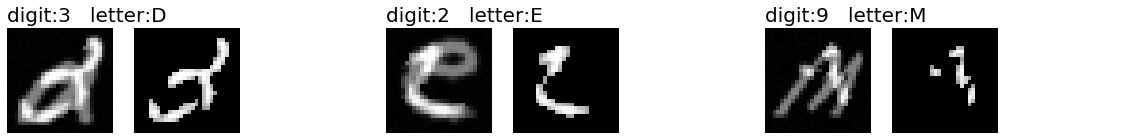

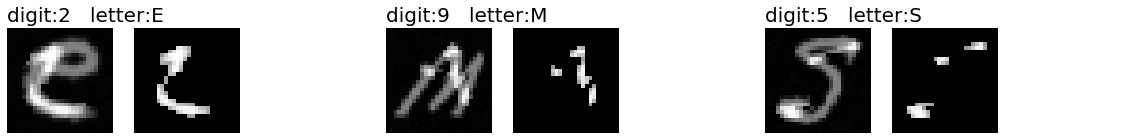

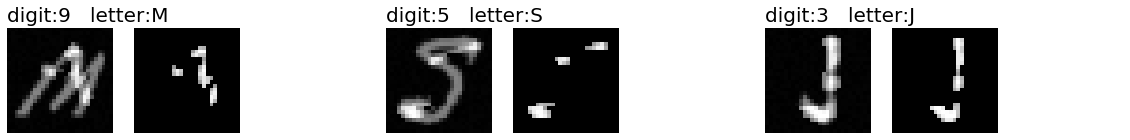

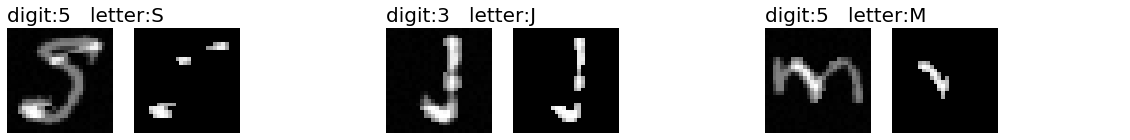

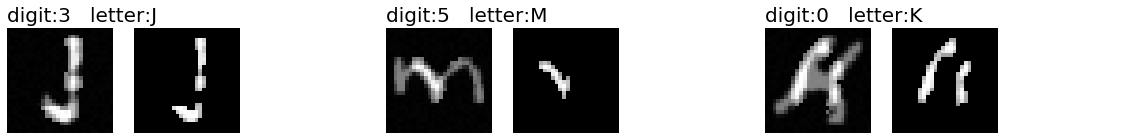

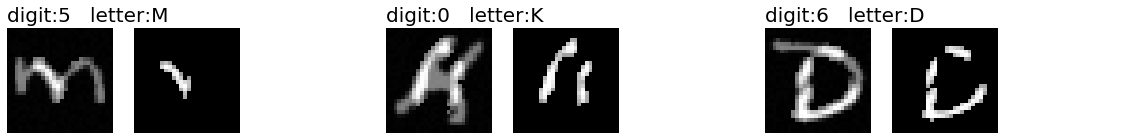

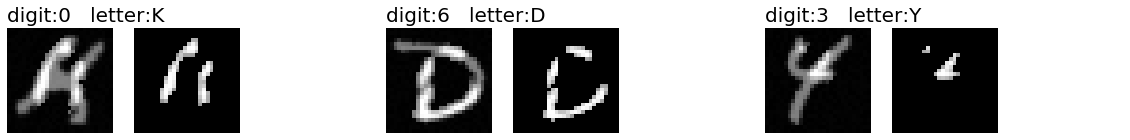

In [43]:
for idx in range(100):
    plt.figure(figsize=(20,30))
    plt.subplot(1,9,1)
    plt.imshow(train_images[idx].reshape(28,28),cmap='gray')
    plt.axis('off')
    
    plt.title('digit:{}   letter:{}'.format(train_digit[idx], train_letter[idx]), loc='left', fontsize=20)

    plt.subplot(1,9,2)
    data = np.where(train_images>=150, train_images , 0)
    plt.imshow(data[idx].reshape(28,28),cmap='gray')
    plt.axis('off')

    plt.subplot(1,9,3)
    plt.imshow(np.zeros((28,28,3))+1,cmap='gray')
    plt.axis('off')
    
    
    plt.subplot(1,9,4)
    plt.imshow(train_images[idx+1].reshape(28,28),cmap='gray')
    plt.axis('off')
    
    plt.title('digit:{}   letter:{}'.format(train_digit[idx+1], train_letter[idx+1]), loc='left', fontsize=20)

    plt.subplot(1,9,5)
    data = np.where(train_images >=150, train_images, 0)
    plt.imshow(data[idx+1].reshape(28,28),cmap='gray')
    plt.axis('off')

    plt.subplot(1,9,6)
    plt.imshow(np.zeros((28,28,3))+1,cmap='gray')
    plt.axis('off')
    
    
    plt.subplot(1,9,7)
    plt.imshow(train_images[idx+2].reshape(28,28),cmap='gray')
    plt.axis('off')
    
    plt.title('digit:{}   letter:{}'.format(train_digit[idx+2], train_letter[idx+2]), loc='left', fontsize=20)

    plt.subplot(1,9,8)
    data = np.where(train_images>=150, train_images, 0)
    plt.imshow(data[idx+2].reshape(28,28),cmap='gray')
    plt.axis('off')

    plt.subplot(1,9,9)
    plt.imshow(np.zeros((28,28,3))+1,cmap='gray')
    plt.axis('off')
    
plt.show()

In [5]:
# Split into Train, Valid Dataset
from sklearn.model_selection import train_test_split
train_images, valid_images, train_digit, valid_digit = train_test_split(train_images, 
                                                                          train_digit, 
                                                                          stratify = train_digit, 
                                                                          random_state = 42, 
                                                                          test_size = 0.2)

In [8]:
print("The Shape of Train Images: ", train_images.shape)
print("The Shape of Valid Images: ", valid_images.shape)
print("The Shape of Test Images: ", test_images.shape)

The Shape of Train Images:  (1638, 784)
The Shape of Valid Images:  (410, 784)
The Shape of Test Images:  (20480, 784)


In [7]:
# Check Train, Valid Label's Shape
print("The Shape of Train Labels: ", train_digit.shape)
print("The Shape of Valid Labels: ", valid_digit.shape)

The Shape of Train Labels:  (1638,)
The Shape of Valid Labels:  (410,)
